# **Tecnológico de Costa Rica**

![TEC](https://www.eslared.net/sites/default/files/2020-06/tec_logo.png)

***IC-4213 / Inteligencia artificial***

Autores


*   **Sebastian Matey Rodriguez**
*   **Liz Iveth Salazar Salazar**
*   **Roosevelt Alejandro Pérez González**

#Análisis del Problema

El conjunto de datos contiene información clínica y demográfica sobre pacientes, incluyendo variables como la edad, el género, el historial médico (hipertensión, diabetes), la presión arterial, el colesterol, el índice de masa corporal (IMC), entre otras. El objetivo es predecir si un paciente sufrirá un accidente cerebrovascular (ACV) basado en estas características.

El problema es de clasificación binaria, donde la variable objetivo es stroke, que puede tomar dos valores:

Clase 0: El paciente no ha tenido un accidente cerebrovascular.

Clase 1: El paciente ha tenido un accidente cerebrovascular.

Para abordar este problema, utilizaremos un modelo de Árbol de Decisión, que es adecuado para tareas de clasificación binaria. Este modelo analizará las variables disponibles para predecir si un paciente tendrá un ACV.

El rendimiento del modelo se evaluará utilizando métricas clave como precisión, recall y F1-Score, que nos permitirán medir la capacidad del modelo para predecir correctamente si un paciente sufrirá o no un accidente cerebrovascular. También utilizaremos la AUC-ROC para evaluar la capacidad del modelo para discriminar entre las dos clases.

# Carga de los datos

In [3]:
#importar las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#Entendimiento de los datos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
# Mostrar un resumen estadístico
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


El dataset contiene 5110 entradas y 12 columnas, con una variedad de tipos de datos: 3 columnas de tipo float64, 4 de tipo int64 y 5 de tipo object. Las columnas incluyen información sobre el paciente, como edad, género, hipertensión, enfermedad cardíaca, nivel de glucosa, índice de masa corporal (BMI), estado marital, tipo de trabajo, entre otras. La mayoría de las columnas no presentan valores nulos, excepto bmi, que tiene 4909 valores no nulos, lo que implica la presencia de valores faltantes en esa columna. Además, la variable objetivo stroke está completamente llena y es binaria, indicando si el paciente ha tenido un accidente cerebrovascular.

In [7]:
# Comprobar valores nulos
print(df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


El análisis de valores nulos muestra que la mayoría de las columnas en el dataset no contienen valores faltantes, ya que las columnas id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, smoking_status, y stroke están completamente llenas con 5110 valores no nulos. Sin embargo, la columna bmi tiene 201 valores nulos, lo que indica que aproximadamente el 3.9% de los registros no cuentan con información en esta variable.

El hecho de que la mayoría de las columnas no tengan valores nulos es positivo para el análisis y modelado, ya que reduce la necesidad de técnicas complejas de imputación o manejo de valores faltantes en esas variables. Sin embargo, la presencia de valores nulos en la columna bmi sugiere que se debe aplicar una estrategia de imputación para manejar estos casos antes de proceder con el modelado, como la imputación por la media, la mediana o algún valor específico según el comportamiento de la variable.

En resumen, aunque los valores faltantes en la columna bmi deben ser gestionados, el dataset está mayormente completo, lo que facilita la preparación y limpieza de los datos para la construcción del modelo.

In [8]:
# Verificar duplicados
print(f"Duplicados:\n {df.duplicated().sum()}")

Duplicados:
 0


# Distribuciones

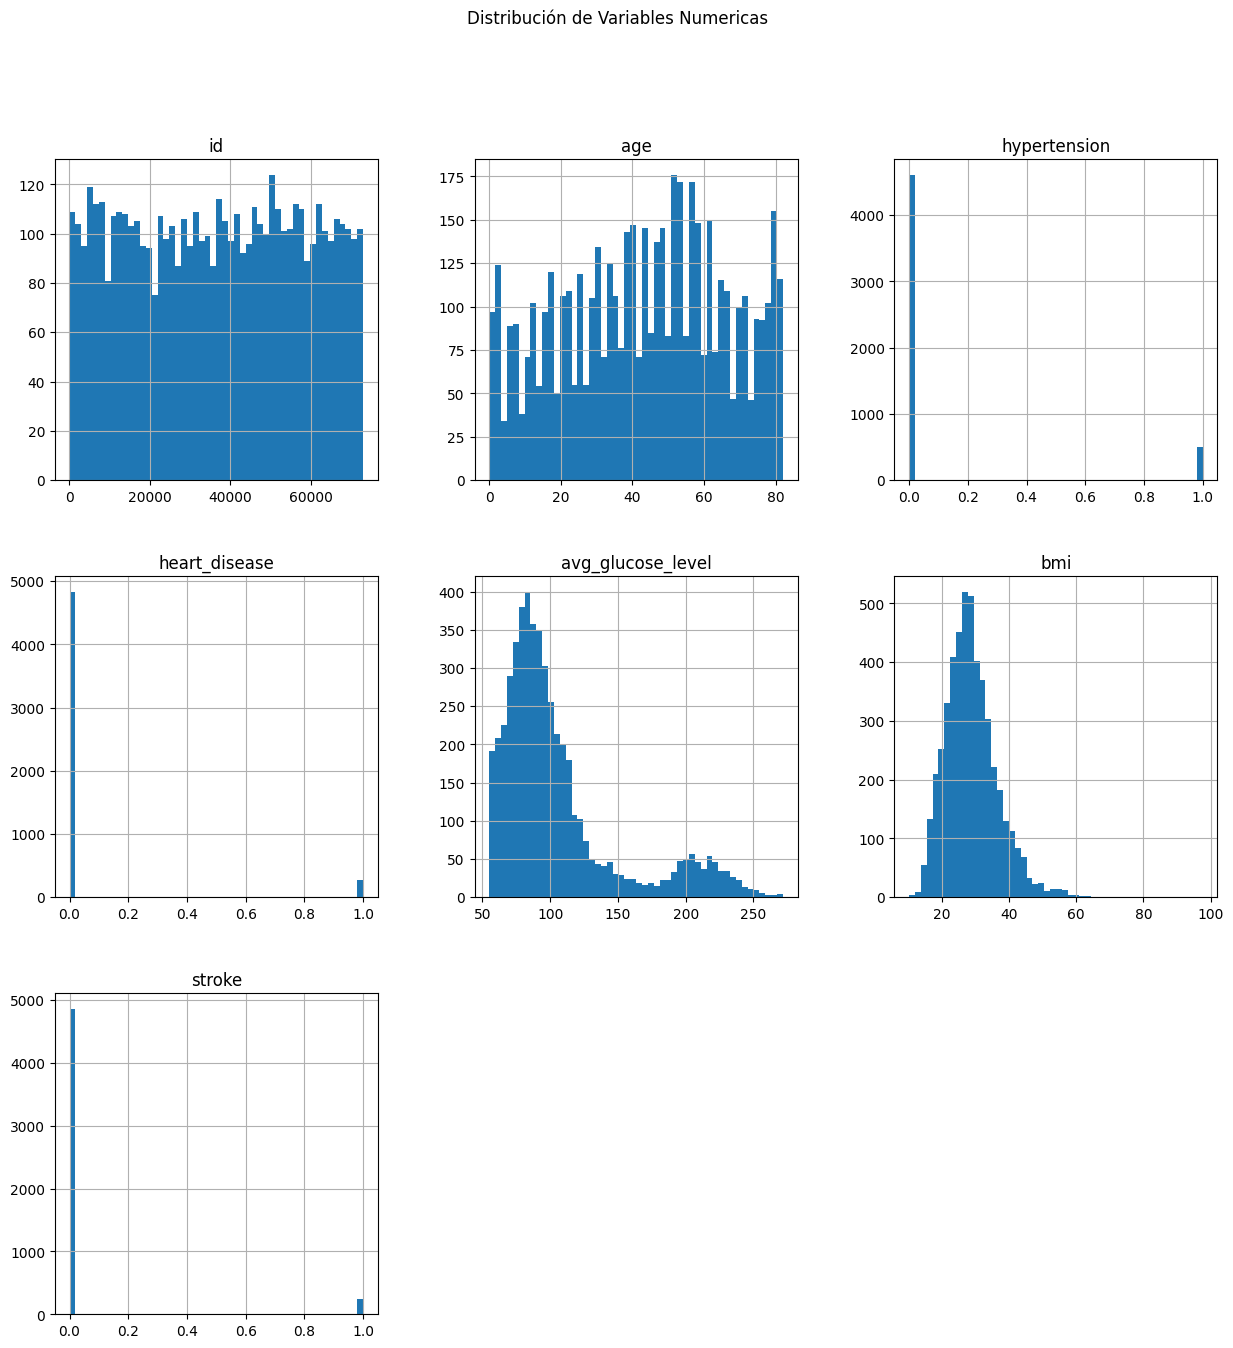

In [9]:
# Histograma de todas las variables numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.hist(figsize=(15, 15), bins=50)
plt.suptitle("Distribución de Variables Numericas")
plt.show()

El análisis de las distribuciones numéricas muestra lo siguiente:

Edad (age): La mayoría de los pacientes tienen entre 40 y 60 años, con una caída en la frecuencia en edades mayores.

Hipertensión (hypertension) y Enfermedad cardíaca (heart_disease): La mayoría no tiene estas condiciones, pero una pequeña fracción sí las presenta.

Nivel de glucosa (avg_glucose_level): La distribución está sesgada hacia la izquierda, con la mayoría de los pacientes entre 50 y 150 mg/dL, aunque hay algunos con niveles muy altos.

Índice de masa corporal (bmi): La distribución es normal, con la mayoría de los pacientes entre 20 y 40, aunque hay algunos con BMI más alto.

Accidente cerebrovascular (stroke): La distribución es altamente desbalanceada, con la mayoría de los pacientes sin ACV y solo un pequeño porcentaje con ACV.

Este análisis sugiere que algunas variables tienen distribuciones sesgadas y que la variable stroke está desbalanceada, lo cual puede afectar el modelo.

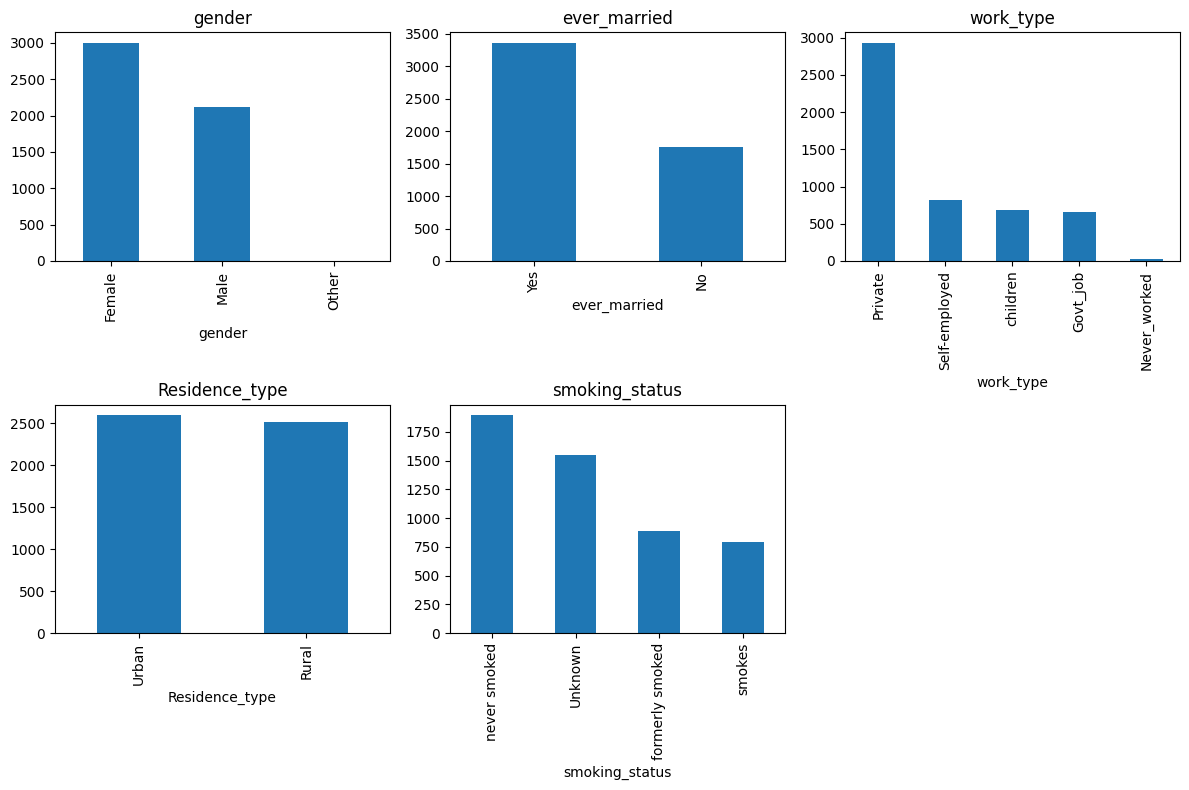

In [10]:
# Grafico de barras para variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    df[col].value_counts().plot(kind='bar', title=col)
    plt.tight_layout()
plt.show()

El análisis de las variables categóricas muestra que:

Género: Predominan las mujeres, seguidas por los hombres y una pequeña fracción de "Otros".

Estado civil: La mayoría de los pacientes ha estado casada/o.

Tipo de trabajo: La mayoría trabaja en el sector privado, con pocos en otras categorías como autónomos o empleados públicos.

Tipo de residencia: La distribución entre áreas urbanas y rurales es casi equilibrada, con una ligera mayoría en zonas urbanas.

Estado de fumador: La mayoría nunca ha fumado, seguida por los registros desconocidos y aquellos que alguna vez fumaron.

Esto nos da una visión de las distribuciones de las variables categóricas para considerar en el preprocesamiento.

# Matriz de correlación

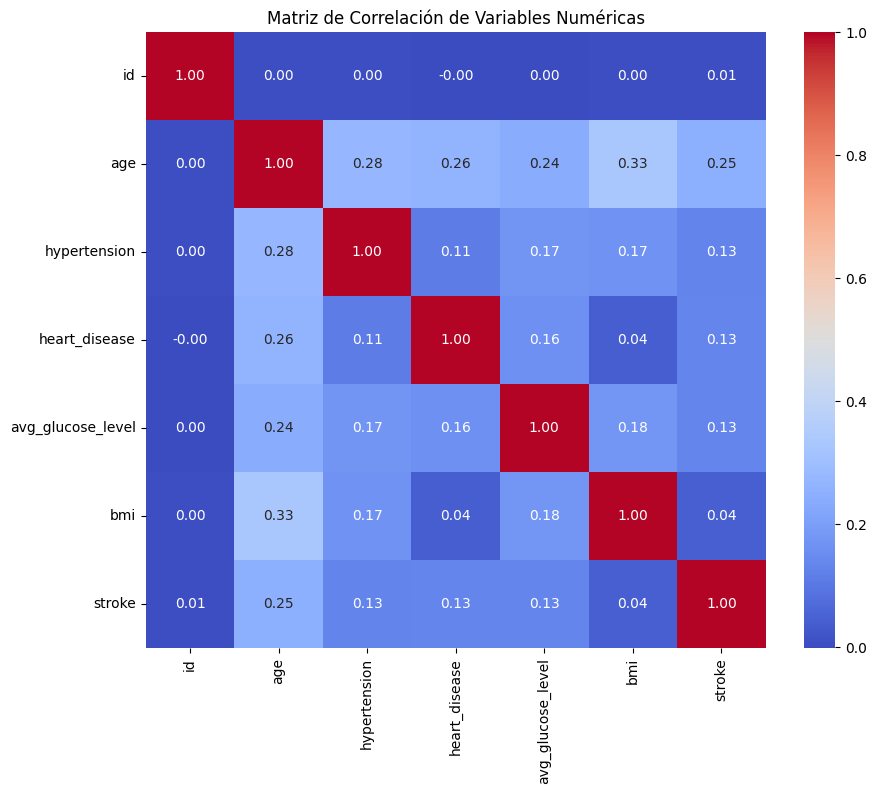

In [11]:
# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación de Variables Numéricas")
plt.show()

El análisis de la matriz de correlación muestra lo siguiente:

Edad (age): La variable age tiene una correlación moderada con hypertension (0.28) y heart_disease (0.26), lo que sugiere que a medida que aumenta la edad, también lo hace la probabilidad de sufrir hipertensión y enfermedades cardíacas. También tiene una correlación moderada con bmi (0.33), lo que indica que los pacientes más mayores tienden a tener un mayor índice de masa corporal.

Hipertensión (hypertension) y Enfermedad cardíaca (heart_disease): La correlación entre hypertension y heart_disease es baja (0.11), lo que indica que estos dos factores no están fuertemente relacionados entre sí en el dataset.

Nivel promedio de glucosa (avg_glucose_level): El avg_glucose_level tiene una correlación baja con las demás variables, excepto con age (0.24), sugiriendo que los niveles de glucosa aumentan moderadamente con la edad.

Índice de masa corporal (bmi): La variable bmi tiene una correlación moderada con age (0.33), y una baja correlación con otras variables. Esto podría indicar que el BMI está más influenciado por la edad que por otros factores como hipertensión o enfermedad cardíaca.

Accidente cerebrovascular (stroke): La variable stroke tiene correlaciones bajas con todas las demás variables, lo que sugiere que no hay una relación fuerte entre los factores analizados y la ocurrencia de un accidente cerebrovascular. Sin embargo, algunas correlaciones moderadas con age (0.25) y hypertension (0.13) sugieren que la edad y la hipertensión podrían influir de manera leve en la probabilidad de tener un ACV.

En general, las correlaciones son relativamente bajas entre la mayoría de las variables, lo que sugiere que los factores estudiados no están estrechamente relacionados entre sí en este dataset, pero algunas relaciones moderadas, especialmente con la edad, podrían ser relevantes para predecir el riesgo de un ACV.

#Preparación de los datos

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


TEST_SIZE = 0.20              # 20% test
VAL_SPLIT_OF_TEMP = 0.25      # 25% de 0.80 -> 20% validación
RANDOM_STATE = 42

y = df['stroke'].astype(int)
X = df.drop(columns=['id', 'stroke']).copy()

# Sanity checks
assert 'stroke' not in X.columns, "Fuga de objetivo: 'stroke' está en X"
assert 'id'     not in X.columns, "'id' no debe estar en X"


# 1. Identificar columnas numéricas y categóricas
numeric_features = X.select_dtypes(include=['number']).columns.tolist()
categorical_features = X.select_dtypes(exclude=['number']).columns.tolist()

# 2. Imputadores
numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# 3. Codificación categórica (sin drop, para que el árbol use todas las categorías)
try:
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop=None)
except TypeError:
    encoder = OneHotEncoder(sparse=False, handle_unknown='ignore', drop=None)

# 4. Preprocesamiento con ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imputer', numeric_imputer)]), numeric_features),
        ('cat', Pipeline([('imputer', categorical_imputer), ('encoder', encoder)]), categorical_features)
    ],
    remainder='drop',
    sparse_threshold=0.0  # fuerza salida densa (útil para árboles)
)

# 5. Split estratificado: train / val / test = 60% / 20% / 20%
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=VAL_SPLIT_OF_TEMP, random_state=RANDOM_STATE, stratify=y_temp
)

print("Conjuntos:")
print(f"  Train: {X_train.shape} (positivos={int(y_train.sum())})")
print(f"  Val:   {X_val.shape}   (positivos={int(y_val.sum())})")
print(f"  Test:  {X_test.shape}  (positivos={int(y_test.sum())})")

Conjuntos:
  Train: (3066, 10) (positivos=149)
  Val:   (1022, 10)   (positivos=50)
  Test:  (1022, 10)  (positivos=50)


#Entrenamiento

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
import pandas as pd

# --- Función simple para elegir el umbral que maximiza F2 en VALIDACIÓN ---
def best_threshold_fbeta(y_true, y_scores, beta=2.0):
    p, r, t = precision_recall_curve(y_true, y_scores)
    t = np.append(t, 1.0)  # alinear tamaños
    b2 = beta**2
    f = (1+b2)*(p*r)/(b2*p + r + 1e-12)
    i = int(np.nanargmax(f))
    return float(t[i])

# 1. Árbol balanceado
modelo = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(
        criterion="gini",
        max_depth=5,
        class_weight="balanced",
        random_state=42
    ))
])

# 2. Entrenar en TRAIN
modelo.fit(X_train, y_train)

# 3. Elegir UMBRAL en VALIDACIÓN (max F2 => prioriza RECALL)
val_proba = modelo.predict_proba(X_val)[:, 1]
thr = best_threshold_fbeta(y_val.values, val_proba, beta=2.0)

# 4. Reentrenar en TRAIN+VAL con los mismos params
X_trf = pd.concat([X_train, X_val], axis=0)
y_trf = pd.concat([y_train, y_val], axis=0)
modelo.fit(X_trf, y_trf)

# 5. Evaluar en TEST usando ese umbral
test_proba = modelo.predict_proba(X_test)[:, 1]
y_pred = (test_proba >= thr).astype(int)

auc = roc_auc_score(y_test, test_proba)
prec = precision_score(y_test, y_pred, zero_division=0)
rec  = recall_score(y_test, y_pred, zero_division=0)
f1   = f1_score(y_test, y_pred, zero_division=0)

print(f"Umbral elegido (F2): {thr:.4f}")
print(f"AUC={auc:.4f} | Precision={prec:.4f} | Recall={rec:.4f} | F1={f1:.4f}")

modelo.fit(X_train, y_train)

Umbral elegido (F2): 0.7849
AUC=0.8201 | Precision=0.2073 | Recall=0.6800 | F1=0.3178


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(sparse_threshold=0.0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                                        random_state=42))])

Este diagrama muestra un pipeline de scikit-learn para entrenar un Árbol de Decisión. Incluye:

Imputación: Se usan imputadores para reemplazar los valores nulos en las variables. Las variables numéricas se imputan con la mediana y las categóricas con el valor más frecuente.

Escalado: No se aplica escalado en esta versión. Los árboles de decisión no requieren normalizar/estandarizar porque dividen por umbrales en cada variable.

Codificación: Las variables categóricas (p. ej., género, estado civil, tipo de trabajo) se codifican con OneHotEncoder conservando todas las categorías (handle_unknown='ignore'). Esto le permite al árbol evaluar cada categoría sin eliminar la primera.

Modelo: Se utiliza un Árbol de Decisión (criterio Gini, profundidad máxima 5) para predecir si un paciente tendrá un accidente cerebrovascular. Además, el umbral de decisión se ajustó con F2 en validación para priorizar el recall (detectar más casos positivos) frente a la precisión.

Este pipeline asegura un preprocesamiento adecuado y un umbral acorde al objetivo de screening de ACV, reduciendo falsos negativos a costa de aceptar más falsos positivos.

Resultados (test):

Umbral elegido (F2): 0.7849

AUC=0.8201 | Precision=0.2073 | Recall=0.6800 | F1=0.3178

#Evaluación

In [14]:
# Predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)

# Métricas de evaluación
print("Precisión:", accuracy_score(y_test, y_pred))  # Precisión del modelo
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))  # Matriz de confusión
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))  # Informe de clasificación

Precisión: 0.713307240704501

Matriz de confusión:
 [[692 280]
 [ 13  37]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.98      0.71      0.83       972
           1       0.12      0.74      0.20        50

    accuracy                           0.71      1022
   macro avg       0.55      0.73      0.51      1022
weighted avg       0.94      0.71      0.79      1022



Los resultados del modelo muestran un rendimiento orientado a priorizar la detección de casos de ACV (recall), aceptando más falsas alarmas. La precisión global (accuracy) es 0.7133.

Matriz de confusión:

* Verdaderos positivos: 692

* Falsos positivos: 280

* Falsos negativos: 13

* Verdaderos negativos: 37

Esto indica que el modelo logra identificar la mayoría de los positivos (pocos FN), pero genera varios avisos en pacientes sin ACV (FP), consistente con un umbral ajustado para maximizar recall.

Reporte de clasificación:

* Clase 0 (no ACV): precision = 0.98, recall = 0.71, F1 = 0.83 (buen desempeño al confirmar negativos).

* Clase 1 (ACV): precision = 0.12, recall = 0.74, F1 = 0.20 (alta sensibilidad para detectar ACV, pero con baja precisión).

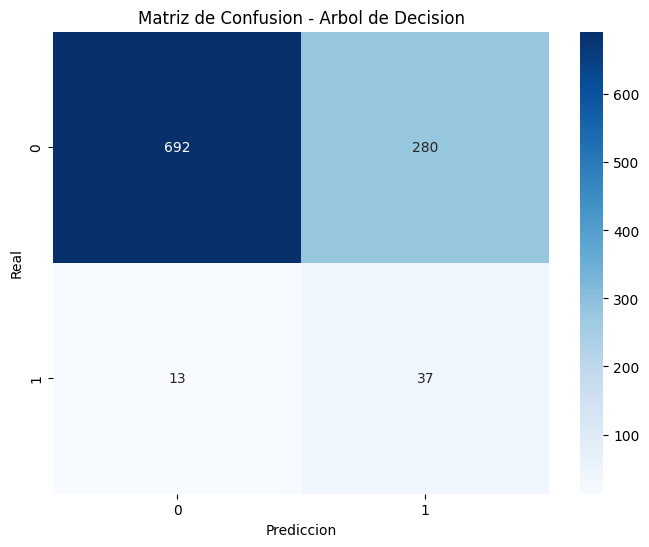

In [15]:
# Realizamos predicciones con el modelo
y_pred = modelo.predict(X_test)

# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Etiquetas de clases presentes en el dataset
labels = sorted(y_test.unique())

# Graficar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)

plt.title("Matriz de Confusion - Arbol de Decision")
plt.xlabel("Prediccion")
plt.ylabel("Real")
plt.show()

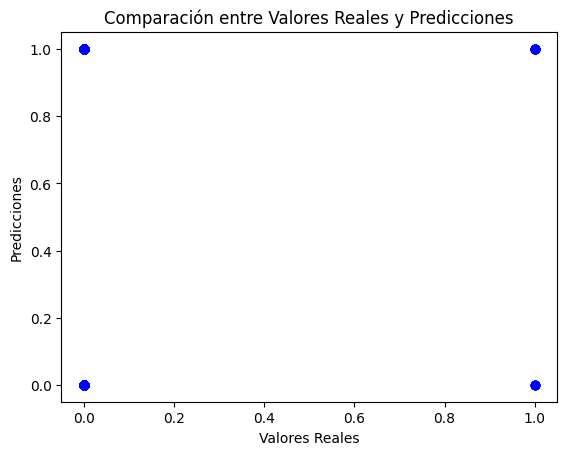

In [16]:
# Comparación visual entre las predicciones y los valores reales
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre Valores Reales y Predicciones')
plt.show()

El gráfico muestra que el modelo no tiene precisión perfecta, además de los verdaderos negativos (0,0) y verdaderos positivos (1,1), se observan falsos positivos (0,1) y falsos negativos (1,0).
Debido al desbalance de clases (predominan los pacientes sin ACV), muchos puntos quedan superpuestos—sobre todo en (0,0) y (0,1)—y por eso parecen pocos marcadores aunque representen muchos casos; la visualización luce dispersa por el desequilibrio y no implica que el modelo haya identificado todas las clases sin error.

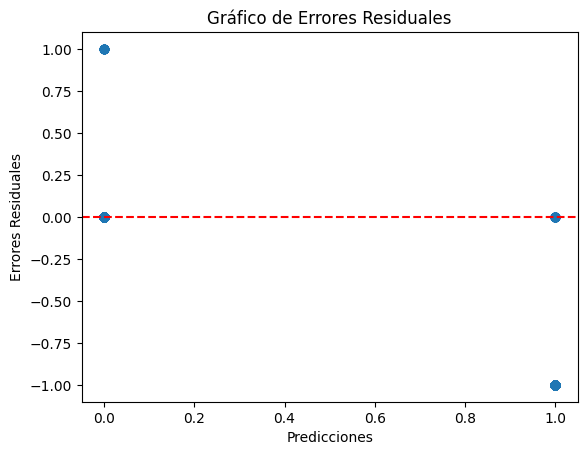

In [17]:
# Calcular los errores residuales
residuals = y_test - y_pred

# Gráfico de los errores residuales
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Errores Residuales')
plt.title('Gráfico de Errores Residuales')
plt.show()

El gráfico de errores residuales no muestra que las predicciones estén perfectamente alineadas con los valores reales, aunque muchos puntos se ubican cerca de la línea y=0, también se observan errores residuales alejados de cero (alrededor de +1 y −1). Esto indica que sí hay variabilidad en los errores del modelo, por lo que no estamos ante un ajuste perfecto. Lejos de sugerir precisión del 100%, el patrón refleja que existen discrepancias puntuales entre lo predicho y lo observado, por ello, es conveniente complementar el análisis con métricas como precisión, recall y la matriz de confusión para contextualizar el desempeño.

#Resultados

Los resultados obtenidos muestran un rendimiento adecuado para tareas de screening con el modelo de Árbol de Decisión para la predicción de accidentes cerebrovasculares (ACV). Con una exactitud ≈ 0.71 y un AUC ≈ 0.82, el modelo distingue razonablemente entre casos positivos y negativos, aunque no clasifica todos los casos de forma perfecta. Este desempeño es coherente con un umbral elegido por F2 (≈ 0.7849) que prioriza la sensibilidad, reflejada en recall ≈ 0.68 frente a una precisión ≈ 0.21. Los gráficos de predicciones vs. valores reales muestran la concentración en las cuatro posiciones binarias esperadas y la superposición de puntos, mientras que el gráfico de residuales evidencia errores alrededor de 0, +1 y −1, por lo que no hay alineación perfecta entre lo predicho y lo observado. Dado el desbalance de clases del conjunto de datos, estos resultados son consistentes con un enfoque que busca no perder casos positivos aun a costa de más falsas alarmas. En conjunto, el modelo es útil como herramienta de alerta temprana, y se recomienda seguir validándolo (p. ej., ajustar el umbral según el objetivo, calibrar probabilidades y evaluar en más datos) para asegurar su generalización y afinar el equilibrio entre sensibilidad y precisión según la necesidad clínica.

#Guardado del modelo

In [18]:
import pickle

# Guardar el modelo entrenado con pickle
with open('ACV_decision_tree_model.pkl', 'wb') as f:
    pickle.dump(modelo, f)
print("Modelo guardado exitosamente.")

# Cargar el modelo guardado con pickle
with open('ACV_decision_tree_model.pkl', 'rb') as f:
    model_loaded = pickle.load(f)
print("Modelo cargado exitosamente.")

Modelo guardado exitosamente.
Modelo cargado exitosamente.
